# Map showing Haro, Rosario and San Juan Channel

Based on Ben's code from: https://github.com/SalishSeaCast/analysis-ben/blob/master/notebooks/Maps.ipynb

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.cm as cma
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc

In [2]:
jan18_data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01jun18/SalishSea_1d_20180601_20180601_grid_T.nc')
jan18_sal = jan18_data['vosaline'][0,5]

In [ ]:
# Load grid and mask files
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_202108.nc')
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask202108.nc')
tmask = 1 - mask.tmask[0]

/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)
/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)
/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: linewidths is ignored by contourf
  result = super().contourf(*args, **kwargs)


Text(0.014, 0.019, '(b)')

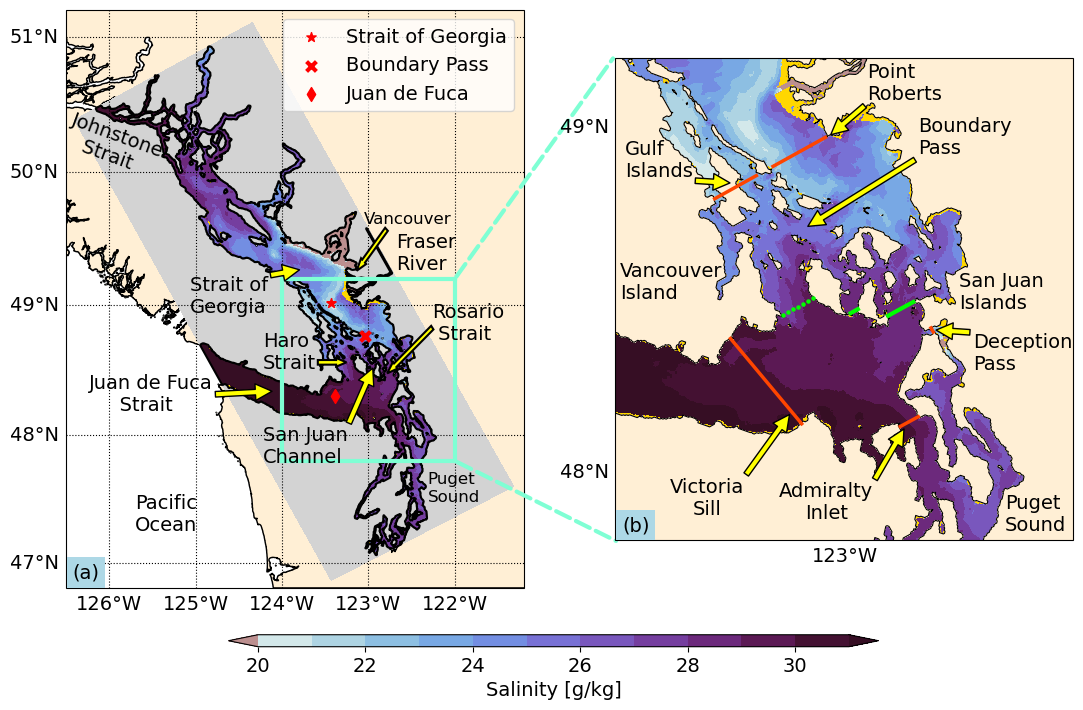

In [ ]:
cmap = cm.dense
cmap.set_bad('papayawhip')
cmap.set_under('rosybrown')

# Mask NaN values in the data
masked_sal = np.ma.masked_array(jan18_data['vosaline'][0,5], mask=tmask[0])

# Increase font size
plt.rcParams['font.size'] = 14

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(13, 8),
                               subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(20, 32, 1),
    cmap=cm.dense, extend='both', transform=crs.PlateCarree(), zorder=2,
)

# Color shallower than 5m gold
for attr, color in zip([ 'contourf'], [ 'gold']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 5, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    ) 

# Overlay domain landmask and coastline 
for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
    )
    
# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='papayawhip'))


# Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', transform=ax.transAxes)
ax.text(0.79, 0.15, 'Puget\nSound', transform=ax.transAxes,fontsize=12)
ax.text(-0.01, 0.71, 'Johnstone\n   Strait', transform=ax.transAxes, rotation=-20)
ax.text(0.43, 0.38, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.72, 0.55, 'Fraser\nRiver', transform=ax.transAxes)
ax.text(0.80, 0.43, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.65, 0.63, 'Vancouver', transform=ax.transAxes,fontsize=12)
ax.arrow(0.55, 0.39, 0.04, 0, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)
ax.arrow(0.80, 0.45, -0.081, -0.065, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)
ax.arrow(0.70, 0.62, -0.05, -0.055, head_width=0.015, width=0.008,linewidth = 1.5,edgecolor='k', facecolor='yellow', transform=ax.transAxes, zorder=10)

ax.annotate('Strait of\nGeorgia',
            xy=(0.51, 0.55), xycoords='axes fraction',
            xytext=(0.27, 0.54), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.annotate('San Juan\nChannel',
            xy=(0.67, 0.38), xycoords='axes fraction',
            xytext=(0.43, 0.28), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

#plot sog current meter
sog_x, sog_y = ax.projection.transform_point(-123.429, 49.013, crs.Geodetic())
ax.scatter(sog_x,sog_y,marker = '*',color='r',s=50,zorder=5,label='Strait of Georgia')

#plot bp current meter
bp_x, bp_y = ax.projection.transform_point(-123.03953, 48.7638, crs.Geodetic())
ax.scatter(bp_x,bp_y,marker='x',color='r',s=50,zorder=5,linewidths=3,label='Boundary Pass')

#plot JdF current meter
jdf_x, jdf_y = ax.projection.transform_point(-123.39, 48.30074, crs.Geodetic())
ax.scatter(jdf_x,jdf_y,marker='d',color='r',s=50,zorder=5,label='Juan de Fuca')

ax.annotate('Juan de Fuca\n     Strait',
            xy=(0.45, 0.34), xycoords='axes fraction',
            xytext=(0.05, 0.37), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.legend(facecolor='w')

# Colorbar
cax = fig.add_axes([0.25, 0.06, 0.5, 0.015])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Salinity [g/kg]');

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# Turn off labels on the top and right
gl.top_labels = False  
gl.right_labels = False  
gl.bottom_labels = True  
gl.left_labels = True  


# Convert geographic coordinates to Mercator projection - left boundary
leftB_start_x, leftB_start_y = ax.projection.transform_point(-124, 47.8, crs.Geodetic())
leftB_end_x, leftB_end_y = ax.projection.transform_point(-124,49.2 , crs.Geodetic())

# Plot the line on the map
ax.plot(np.linspace(leftB_start_x, leftB_end_x,20), np.linspace(leftB_start_y, leftB_end_y,20),color='aquamarine',lw=3)

# Convert geographic coordinates to Mercator projection - bottom bndy
botB_start_x, botB_start_y = ax.projection.transform_point(-124, 47.8, crs.Geodetic())
botB_end_x, botB_end_y = ax.projection.transform_point(-122,47.8 , crs.Geodetic())
ax.plot(np.linspace(botB_start_x, botB_end_x,20), np.linspace(botB_start_y, botB_end_y,20),color='aquamarine',lw=3)

# Convert geographic coordinates to Mercator projection - Right bndy
rightB_start_x, rightB_start_y = ax.projection.transform_point(-122, 47.8, crs.Geodetic())
rightB_end_x, rightB_end_y = ax.projection.transform_point(-122,49.2 , crs.Geodetic())
ax.plot(np.linspace(rightB_start_x, rightB_end_x,20), np.linspace(rightB_start_y, rightB_end_y,20),color='aquamarine',lw=3)

# Convert geographic coordinates to Mercator projection - top bndy
topB_start_x, topB_start_y = ax.projection.transform_point(-124, 49.2, crs.Geodetic())
topB_end_x, topB_end_y = ax.projection.transform_point(-122,49.2 , crs.Geodetic())
ax.plot(np.linspace(topB_start_x, topB_end_x,20), np.linspace(topB_start_y, topB_end_y,20),color='aquamarine',lw=3)


######################
########Inset Map###### 
######################

## Plot area for inset map
xlim2, ylim2 = [-124, -122], [47.8, 49.2]
ax2.set_extent(xlim2 + ylim2)

# Draw coastline
ax2.add_feature(feature.GSHHSFeature('full', edgecolor='k',lw=0.8, facecolor='papayawhip'))

c = ax2.pcolormesh(
    grid.nav_lon, grid.nav_lat,masked_sal, cmap=cmap,
    vmin=20, vmax=32, transform=crs.PlateCarree(), zorder=2,
)

# Overlay bathymetry
c = ax2.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(20,32,1),
    cmap=cmap, extend='both', transform=crs.PlateCarree(), zorder=2,
)

# Color shallowe than 5m gold
for attr, color in zip([ 'contourf'], [ 'gold']):
    getattr(ax2, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 5, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    ) 
    
# Overlay domain landmask
for attr, color in zip([ 'contourf'], [ 'papayawhip']):
    getattr(ax2, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    ) 

# Overlay domain coastline
for attr, color in zip([ 'contour'], [ 'k']):
    getattr(ax2, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    )
    
# Draw coastline
ax2.add_feature(feature.GSHHSFeature('full', edgecolor='grey',lw=0.4, facecolor='papayawhip'))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim2, ylim2]]
gl = ax2.gridlines( color='None', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False


# Convert geographic coordinates to Mercator projection - VicSill line
vs_start_x, vs_start_y = ax2.projection.transform_point(grid.nav_lon[233,190], grid.nav_lat[233,190], crs.Geodetic())
vs_end_x, vs_end_y = ax2.projection.transform_point(grid.nav_lon[303,175], grid.nav_lat[303,175], crs.Geodetic())
ax2.plot([vs_start_x, vs_end_x], [vs_start_y, vs_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - PR line
pr_start_x, pr_start_y = ax2.projection.transform_point(grid.nav_lon[386,264], grid.nav_lat[386,264], crs.Geodetic())
pr_end_x, pr_end_y = ax2.projection.transform_point(grid.nav_lon[386,308], grid.nav_lat[386,308], crs.Geodetic())
ax2.plot([pr_start_x, pr_end_x], [pr_start_y, pr_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Gulf line
gulf_start_x, gulf_start_y = ax2.projection.transform_point(grid.nav_lon[386,215], grid.nav_lat[386,215], crs.Geodetic())
gulf_end_x, gulf_end_y = ax2.projection.transform_point(grid.nav_lon[386,250], grid.nav_lat[386,250], crs.Geodetic())
ax2.plot([gulf_start_x, gulf_end_x], [gulf_start_y, gulf_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Admiralty line 
adm_start_x, adm_start_y = ax2.projection.transform_point(grid.nav_lon[201,252], grid.nav_lat[201,252], crs.Geodetic())
adm_end_x, adm_end_y = ax2.projection.transform_point(grid.nav_lon[201,267], grid.nav_lat[201,267], crs.Geodetic())
ax2.plot([adm_start_x, adm_end_x], [adm_start_y, adm_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Deception 
dec_start_x, dec_start_y = ax2.projection.transform_point(grid.nav_lon[244,307], grid.nav_lat[244,307], crs.Geodetic())
dec_end_x, dec_end_y = ax2.projection.transform_point(grid.nav_lon[247,307], grid.nav_lat[247,307], crs.Geodetic())
ax2.plot([dec_start_x, dec_end_x], [dec_start_y, dec_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Rosario
ros_start_x, ros_start_y = ax2.projection.transform_point(grid.nav_lon[267,284], grid.nav_lat[267,284], crs.Geodetic())
ros_end_x, ros_end_y = ax2.projection.transform_point(grid.nav_lon[267,305], grid.nav_lat[267,305], crs.Geodetic())
ax2.plot([ros_start_x, ros_end_x], [ros_start_y, ros_end_y], color='lime',lw=3)

# Convert geographic coordinates to Mercator projection - Haro
haro_start_x, haro_start_y = ax2.projection.transform_point(grid.nav_lon[300,217], grid.nav_lat[300,217], crs.Geodetic())
haro_end_x, haro_end_y = ax2.projection.transform_point(grid.nav_lon[300,242], grid.nav_lat[300,242], crs.Geodetic())
ax2.scatter(np.linspace(haro_start_x, haro_end_x,7), np.linspace(haro_start_y, haro_end_y,7), color='lime',s=5,zorder=3)

# Convert geographic coordinates to Mercator projection - SJC
sjc_start_x, sjc_start_y = ax2.projection.transform_point(grid.nav_lon[280,261], grid.nav_lat[280,261], crs.Geodetic())
sjc_end_x, sjc_end_y = ax2.projection.transform_point(grid.nav_lon[280,267], grid.nav_lat[280,267], crs.Geodetic())
ax2.plot(np.linspace(sjc_start_x, sjc_end_x,20), np.linspace(sjc_start_y, sjc_end_y,20),color='lime',lw=3)

# # Add annotations

ax2.annotate('Point\nRoberts',
            xy=(0.47, 0.84), xycoords='axes fraction',
            xytext=(0.55, 0.99), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax2.annotate('Deception\nPass',
            xy=(0.7, 0.435), xycoords='axes fraction',
            xytext=(0.78, 0.43), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax2.annotate('Victoria\nSill',
            xy=(0.38, 0.26), xycoords='axes fraction',
            xytext=(0.2, 0.13), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='center')


ax2.annotate('Boundary\nPass',
            xy=(0.42, 0.65), xycoords='axes fraction',
            xytext=(0.66, 0.80), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),)

ax2.annotate('Admiralty\nInlet',
            xy=(0.63, 0.23), xycoords='axes fraction',
            xytext=(0.46, 0.12), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='center')

ax2.annotate('Gulf\nIslands',
            xy=(0.25, 0.74), xycoords='axes fraction',
            xytext=(0.02, 0.83), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax2.text(0.01, 0.5, 'Vancouver\nIsland', transform=ax2.transAxes)
ax2.text(0.75, 0.48, 'San Juan\nIslands', transform=ax2.transAxes);
ax2.text(0.85, 0.02, 'Puget\nSound', transform=ax2.transAxes);

# Convert geographic coordinates to Mercator projection - top point on sji map
sji_map_top_x, sji_map_top_y = ax.projection.transform_point(-120.15, 50.86, crs.Geodetic())

# Convert geographic coordinates to Mercator projection - bottom point on sji map
sji_map_bot_x, sji_map_bot_y = ax.projection.transform_point(-120.105, 47.162, crs.Geodetic())

ax.annotate("",
            xytext=(rightB_end_x, rightB_end_y),  # Target point on the right subplot
            xy=(sji_map_top_x, sji_map_top_y),  # Start point (center of the box)
            xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle="-",linestyle='--', lw=3, color='aquamarine'))

ax.annotate("",
            xytext=(rightB_start_x, rightB_start_y),  # Target point on the right subplot
            xy=(sji_map_bot_x, sji_map_bot_y),  # Start point (center of the box)
            xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle="-",linestyle='--', lw=3, color='aquamarine'))

ax.text(0.015, 0.017, "(a)", transform=ax.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))
ax2.text(0.014, 0.019, "(b)", transform=ax2.transAxes,bbox=dict(facecolor='lightblue', edgecolor='none'))

In [6]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/SJGI_inset_map.jpg',bbox_inches='tight')

In [10]:
import pandas as pd
data_stat = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/model_evals/ObsModel/ObsModel_202111_CIOOS_gridU_20210101_20211231.csv')
lat_stat = data_stat['j']
lon_stat = data_stat['i']

lat_stat_u = lat_stat.unique()
lon_stat_u = lon_stat.unique()
lat_stat_u,lon_stat_u

(array([419]), array([263]))

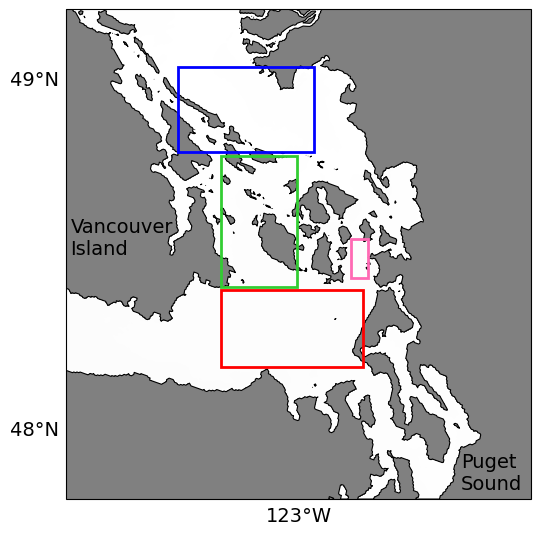

In [ ]:
#Plot for boundaries of Ariane runs
import matplotlib.gridspec as gridspec

# Make plot area
xlim, ylim = [-124, -122], [47.8, 49.2]
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k',lw=0.8, facecolor='papayawhip'))

cmap = cma.Greys
cmap.set_bad('grey')
cmap.set_under('white')
# reversed_cmap = plt.cm.get_cmap('ocean_r')

# Mask NaN values in the data
masked_sal = np.ma.masked_array(jan18_sal, mask=tmask[0])

c = ax.pcolormesh(
    grid.nav_lon, grid.nav_lat,masked_sal, cmap=cmap,
    vmin=20, vmax=500, transform=crs.PlateCarree(), zorder=2,
)

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(20,500,1),
    cmap=cmap, extend='both', transform=crs.PlateCarree(), zorder=2,
)

# Overlay domain landmask and coastline
for attr, color in zip([ 'contour'], [ 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    )
    
# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='grey',lw=0.4, facecolor='grey'))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines( color='None', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False

ssog_lonmin,ssog_latmin = ax.projection.transform_point(-123.51667,48.796185, crs.Geodetic())
ssog_lonmax,ssog_latmax = ax.projection.transform_point(-122.93283,49.036263, crs.Geodetic())

rectangle = plt.Rectangle((ssog_lonmin,ssog_latmin), ssog_lonmax - ssog_lonmin, ssog_latmax - ssog_latmin, 
                          edgecolor='blue', facecolor='none', linewidth=2,zorder=3)

# Add the ssog box to the plot
ax.add_patch(rectangle)

haro_lonmin,haro_latmin = ax.projection.transform_point(-123.335,48.41217, crs.Geodetic())
haro_lonmax,haro_latmax = ax.projection.transform_point(-123.00784,48.783842, crs.Geodetic())

rectangle = plt.Rectangle((haro_lonmin,haro_latmin), haro_lonmax - haro_lonmin, haro_latmax - haro_latmin, 
                          edgecolor='limegreen', facecolor='none', linewidth=2,zorder=3)

# Add the haro box to the plot
ax.add_patch(rectangle)


ros_lonmin,ros_latmin = ax.projection.transform_point(-122.775,48.549, crs.Geodetic())
ros_lonmax,ros_latmax = ax.projection.transform_point(-122.70084,48.435835, crs.Geodetic())

rectangle = plt.Rectangle((ros_lonmin,ros_latmin), ros_lonmax - ros_lonmin, ros_latmax - ros_latmin, 
                          edgecolor='hotpink', facecolor='none', linewidth=2,zorder=3)

# Add the ros to the plot
ax.add_patch(rectangle)

ejdf_lonmin,ejdf_latmin = ax.projection.transform_point(-123.33366,48.1805, crs.Geodetic())
ejdf_lonmax,ejdf_latmax = ax.projection.transform_point(-122.724,48.40217, crs.Geodetic())

rectangle = plt.Rectangle((ejdf_lonmin,ejdf_latmin), ejdf_lonmax - ejdf_lonmin, ejdf_latmax - ejdf_latmin, 
                          edgecolor='red', facecolor='none', linewidth=2,zorder=3)

# Add the ejdf to the plot
ax.add_patch(rectangle)

ax.text(0.01, 0.5, 'Vancouver\nIsland', transform=ax.transAxes)
ax.text(0.85, 0.02, 'Puget\nSound', transform=ax.transAxes);

In [12]:
fig.savefig('/ocean/cstang/MOAD/analysis-camryn/Figures/model_eval_boxes.png',bbox_inches='tight')